<a href="https://colab.research.google.com/github/kshakib22/climateChange-graphTheory/blob/main/Climate_Change.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyvis
!pip install geopy
!pip install folium
import pandas as pd
from pyvis.network import Network
import networkx as nx
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from pyvis.network import Network
import pandas as pd
import networkx as nx
from itertools import combinations
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import pdist, squareform
from geopy.distance import geodesic
from tqdm import tqdm
import folium


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 14.5 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd

# Load the CSV file into a DataFrame
csv_path = '/content/drive/MyDrive/ML data/The Climate Change Twitter Dataset.csv'

# Load the CSV file into a DataFrame without auto-generated index and with custom column names
csv_path = '/content/drive/MyDrive/ML data/The Climate Change Twitter Dataset.csv'
df = pd.read_csv(csv_path, index_col=False)


In [6]:
df

,created_at,id,lng,lat,topic,sentiment,stance,gender,temperature_avg,aggressiveness
0,2006-06-06 16:06:42+00:00,6132,NaN,NaN,Weather Extremes,-0.097180,neutral,female,NaN,aggressive
1,2006-07-23 21:52:30+00:00,13275,-73.949582,40.650104,Weather Extremes,0.575777,neutral,undefined,-1.114768,aggressive
2,2006-08-29 01:52:30+00:00,23160,NaN,NaN,Weather Extremes,0.500479,neutral,male,NaN,aggressive
3,2006-11-07 02:46:52+00:00,57868,NaN,NaN,Weather Extremes,0.032816,neutral,male,NaN,aggressive
4,2006-11-27 14:27:43+00:00,304553,NaN,NaN,Importance of Human Intervantion,-0.090428,neutral,male,NaN,aggressive
...,...,...,...,...,...,...,...,...,...,...
15789406,2019-10-01 05:50:32+00:00,1178910045783937024,NaN,NaN,Global stance,-0.010875,believer,male,NaN,not aggressive
15789407,2019-10-01 05:50:49+00:00,1178910117095305216,-118.243680,34.052230,Global stance,-0.685905,believer,female,-3.126811,not aggressive
15789408,2019-10-01 05:53:37+00:00,1178910821750992896,100.501440,13.753980,Politics,0.343705,neutral,female,-0.364467,not aggressive
15789409,2019-10-01 05:54:37+00:00,1178911073371643904,NaN,NaN,Politics,-0.088496,believer,female,NaN,not aggressive


In [7]:
# Convert 'created_at' column to datetime format if not already done
df['created_at'] = pd.to_datetime(df['created_at'])


# Selecting only year 2019 using the `isin` method
# Ignore the variable name for now
df_2019 = df[df['created_at'].dt.year.isin([2019])]


# Print unique years in the 'created_at' column
print(df_2019['created_at'].dt.year.unique())

# Filter out rows with missing geolocation and temperature data
df_2019 = df_2019.dropna(subset=['lat', 'lng', 'temperature_avg'])

# Display basic statistics
print(df_2019.describe())
print(df_2019.shape[0])

[2019]
                 id            lng            lat      sentiment  \
count  6.896800e+05  689680.000000  689680.000000  689680.000000   
mean   1.121351e+18     -42.340264      34.555762      -0.030832   
std    1.580786e+16      75.397965      23.484216       0.450469   
min    1.079890e+18    -178.266670     -85.516670      -0.984822   
25%    1.120333e+18     -93.600384      33.448437      -0.437603   
50%    1.123846e+18     -75.690308      40.712728      -0.056041   
75%    1.127937e+18      -0.267533      49.260872       0.399535   
max    1.178911e+18     179.383000      80.125839       0.988330   

       temperature_avg  
count    689680.000000  
mean          2.333405  
std           3.289571  
min          -9.330929  
25%          -0.126670  
50%           2.741737  
75%           4.718789  
max          10.340350  
689680


In [8]:
# Select last 500 rows from filtered data
df_last_500 = df_2019.tail(500)
df_last_500.shape[0]
df_last_500.tail()

,created_at,id,lng,lat,topic,sentiment,stance,gender,temperature_avg,aggressiveness
15789396,2019-10-01 05:36:47+00:00,1178906585487364096,-65.957390,18.380780,Global stance,-0.685905,believer,male,-0.164199,not aggressive
15789404,2019-10-01 05:47:06+00:00,1178909181752930304,-118.191604,33.769016,Global stance,-0.685905,believer,male,-2.132015,not aggressive
15789405,2019-10-01 05:50:26+00:00,1178910020626464768,5.337804,50.930374,Undefined / One Word Hashtags,0.385609,neutral,male,6.402293,not aggressive
15789407,2019-10-01 05:50:49+00:00,1178910117095305216,-118.243680,34.052230,Global stance,-0.685905,believer,female,-3.126811,not aggressive
15789408,2019-10-01 05:53:37+00:00,1178910821750992896,100.501440,13.753980,Politics,0.343705,neutral,female,-0.364467,not aggressive


In [9]:
# Check for missing values in 'lat' and 'lng' columns
missing_values_lat = df_last_500['lat'].isnull().any()
missing_values_lng = df_last_500['lng'].isnull().any()

if not missing_values_lat and not missing_values_lng:
    print("No missing values found in 'lat' and 'lng' columns.")
else:
    print("Missing values found in 'lat' or 'lng' columns.")

No missing values found in 'lat' and 'lng' columns.


In [10]:
from tqdm import tqdm

# Define threshold distance (in kilometers)
threshold_distance = 50

# Initialize progress bar
total_iterations = (len(df_last_500) * (len(df_last_500) - 1)) // 2
progress_bar = tqdm(total=total_iterations, desc="Calculating Edges", unit="iteration")

# Add edges based on geographical distance and sentiment similarity
edges = []
weights = []

# Iterate over each row in the DataFrame
for i in range(len(df_last_500)):
    for j in range(i + 1, len(df_last_500)):
        id_i = df_last_500.iloc[i]['id']
        id_j = df_last_500.iloc[j]['id']
        loc1 = (df_last_500.iloc[i]['lat'], df_last_500.iloc[i]['lng'])
        loc2 = (df_last_500.iloc[j]['lat'], df_last_500.iloc[j]['lng'])

        distance = geodesic(loc1, loc2).km

        if distance <= threshold_distance:
            sentiment_similarity = 1 - abs(df_last_500.iloc[i]['sentiment'] - df_last_500.iloc[j]['sentiment'])
            edges.append((id_i, id_j))
            weights.append(sentiment_similarity)

        # Update progress bar
        progress_bar.update(1)

# Close progress bar
progress_bar.close()

# Check the length of edges and weights after the loop
print("Number of edges:", len(edges))
print("Number of weights:", len(weights))


Calculating Edges: 100%|██████████| 124750/124750 [01:36<00:00, 1287.08iteration/s]

Number of edges: 850
Number of weights: 850


In [11]:
print(edges)

[(1178287644620591104, 1178414056761372672), (1178287644620591104, 1178677119297171712), (1178287644620591104, 1178850931271770112), (1178288487684100096, 1178310491007078400), (1178288487684100096, 1178367239923359488), (1178288487684100096, 1178406754461343488), (1178288487684100096, 1178750930667425792), (1178289024546549760, 1178290811311706112), (1178289024546549760, 1178782215989125120), (1178289024546549760, 1178813929096716288), (1178289024546549760, 1178866185951162368), (1178290140248231936, 1178469757126877184), (1178290811311706112, 1178782215989125120), (1178290811311706112, 1178813929096716288), (1178290811311706112, 1178866185951162368), (1178293822830317568, 1178295089497595904), (1178293822830317568, 1178385694861021184), (1178293822830317568, 1178526107592773632), (1178293822830317568, 1178653270480478208), (1178293822830317568, 1178759361222578176), (1178293822830317568, 1178809508333834240), (1178293822830317568, 1178904026940936192), (1178293877347934208, 117829796

In [12]:
# Initialize graph
G = nx.Graph()

# Add nodes with attributes using the 'id' field as the node identifier
for idx, row in df_last_500.iterrows():
    # Convert lat and lng to float with 5 decimal places
    lat = round(float(row['lat']), 5)
    lng = round(float(row['lng']), 5)
    # Use the 'id' field as the node identifier
    node_id = row['id']
    # Add node with attributes
    G.add_node(node_id, lat=lat, sentiment=row['sentiment'], temp=row['temperature_avg'], lng=lng)



In [13]:
print(G.nodes(data=True))
print(len(G.nodes()))

[(1178287644620591104, {'lat': 52.53102, 'sentiment': -0.8423316285133362, 'temp': 4.8523903, 'lng': -1.26491}), (1178288487684100096, {'lat': 53.79648, 'sentiment': 0.4102480709552765, 'temp': 4.9769745, 'lng': -1.54785}), (1178289024546549760, {'lat': 28.75054, 'sentiment': -0.4635143086671829, 'temp': 0.35680318, 'lng': -82.5001}), (1178289079059963904, {'lat': 46.81228, 'sentiment': -0.4468505443811417, 'temp': 6.905975, 'lng': -71.21454}), (1178290068945080320, {'lat': 60.39431, 'sentiment': -0.0884955078363418, 'temp': 9.890248, 'lng': 5.32592}), (1178290140248231936, {'lat': 17.97121, 'sentiment': 0.4615514576435089, 'temp': 0.14573535, 'lng': -76.79281}), (1178290811311706112, {'lat': 29.00514, 'sentiment': 0.2377994978904724, 'temp': 0.8883446, 'lng': -82.40399}), (1178293126575866112, {'lat': 44.20571, 'sentiment': -0.5790162811756133, 'temp': 3.6023824, 'lng': -70.75378}), (1178293667636879360, {'lat': 50.82838, 'sentiment': 0.4102480709552765, 'temp': 3.738043, 'lng': -0.13

In [14]:
# Normalize edge weights to [0, 1] range
min_weight = min(weights)
max_weight = max(weights)
normalized_weights = [(weight - min_weight) / (max_weight - min_weight) for weight in weights]

# Add edges to the graph with normalized weights
for edge, weight in zip(edges, normalized_weights):
    G.add_edge(edge[0], edge[1], weight=weight)


In [15]:
# Define positions using the spring layout
pos = nx.spring_layout(G)

# Create trace for nodes
node_trace = go.Scatter(
    x=[pos[idx][0] for idx in G.nodes()],
    y=[pos[idx][1] for idx in G.nodes()],
    mode='markers',
    hoverinfo='text',
    marker=dict(
        color=[G.nodes[node]['sentiment'] for node in G.nodes()],
        size=10,
        line_width=2,
        colorscale='Viridis',
        colorbar=dict(
            title='Sentiment'
        )
    )
)


edge_trace = go.Scatter(
    x=[pos[edge[0]][0] for edge in G.edges()],  # Corrected bracket placement
    y=[pos[edge[1]][1] for edge in G.edges()],  # Corrected bracket placement
    mode='lines',
    line=dict(width=1, color='gray'),
)


# Create figure
fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                    title='Force-Directed Graph Visualization',
                    showlegend=False,
                    hovermode='closest',
                    margin=dict(b=20, l=5, r=5, t=40),
                    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )

# Show the figure
fig.show()

In [19]:


# Calculate mean latitude and longitude
mean_lat = df_last_500['lat'].mean()
mean_lng = df_last_500['lng'].mean()

# Print the mean latitude and longitude for debugging
print(f"Mean Latitude: {mean_lat}, Mean Longitude: {mean_lng}")

# Initialize folium map centered at mean latitude and longitude with a different tile provider
m = folium.Map(location=[mean_lat, mean_lng], zoom_start=10, tiles='Stamen Terrain')

for node in G.nodes():
    # Retrieve the 'id' value for the current node
    node_id = node

    # Retrieve the corresponding row from the DataFrame based on the 'id'
    row = df_last_500[df_last_500['id'] == node_id]

    # Check if the row exists
    if not row.empty:
        # Extract latitude and longitude from the row
        lat = row['lat'].values[0]
        lng = row['lng'].values[0]

        # Create marker with the location
        folium.Marker(
            location=[lat, lng],
            popup=f"Node {node}",
            icon=None
        ).add_to(m)
    else:
        print(f"No data found for node {node_id}")

# Add edges to the map
for edge in G.edges():
    # Retrieve corresponding rows for source and target nodes
    source_row = df_last_500[df_last_500['id'] == edge[0]]
    target_row = df_last_500[df_last_500['id'] == edge[1]]

    # Check if both rows exist (handle potential missing data)
    if not source_row.empty and not target_row.empty:
        # Extract latitude and longitude for source and target nodes
        source_lat = source_row['lat'].values[0]
        source_lng = source_row['lng'].values[0]
        target_lat = target_row['lat'].values[0]
        target_lng = target_row['lng'].values[0]

        # Create PolyLine for the edge
        folium.PolyLine(
            locations=[[source_lat, source_lng], [target_lat, target_lng]],
            color='blue',
            weight=10,
            opacity=0.5
        ).add_to(m)
    else:
        print(f"Missing data for edge: ({edge[0]}, {edge[1]})")


Mean Latitude: 33.2510852168, Mean Longitude: -47.53807242500483


In [20]:
# Generate HTML for the map
m.save("map.html")
# Display the map
m

# Other stuff -- centrality, community (experimental)


In [ ]:
# Graph analysis: centrality and community detection
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
communities = nx.community.greedy_modularity_communities(G, weight='weight')

In [ ]:
print(G.nodes(data=True))
print(len(G.nodes()))
print(G.edges(data=True))
print(len(G.edges()))

[(1178287644620591104, {'lat': 52.53102, 'sentiment': -0.8423316285133362, 'temp': 4.8523903, 'lng': -1.26491}), (1178288487684100096, {'lat': 53.79648, 'sentiment': 0.4102480709552765, 'temp': 4.9769745, 'lng': -1.54785}), (1178289024546549760, {'lat': 28.75054, 'sentiment': -0.4635143086671829, 'temp': 0.35680318, 'lng': -82.5001}), (1178289079059963904, {'lat': 46.81228, 'sentiment': -0.4468505443811417, 'temp': 6.905975, 'lng': -71.21454}), (1178290068945080320, {'lat': 60.39431, 'sentiment': -0.0884955078363418, 'temp': 9.890248, 'lng': 5.32592}), (1178290140248231936, {'lat': 17.97121, 'sentiment': 0.4615514576435089, 'temp': 0.14573535, 'lng': -76.79281}), (1178290811311706112, {'lat': 29.00514, 'sentiment': 0.2377994978904724, 'temp': 0.8883446, 'lng': -82.40399}), (1178293126575866112, {'lat': 44.20571, 'sentiment': -0.5790162811756133, 'temp': 3.6023824, 'lng': -70.75378}), (1178293667636879360, {'lat': 50.82838, 'sentiment': 0.4102480709552765, 'temp': 3.738043, 'lng': -0.13

In [ ]:
print(communities)
print(len(communities))

[frozenset({1178799953683963904, 1178887987934855168, 1178800004032425984, 1178745259955650560, 1178743208949366784, 1178740080002756608, 1178720647800688640, 1178685528880766976, 1178522227844767488, 1178808476539080704, 1178361372083511296, 1178399456384864512, 1178852801935335424, 1178822917506752512, 1178407886914904064, 1178909181752930304, 1178910117095305216, 1178806903637467136}), frozenset({1178424131492208640, 1178361330165829632, 1178664297318121472, 1178549495027470336, 1178761718408896512, 1178806748460830720, 1178773273737252864, 1178351628732289024, 1178513130416152576, 1178352308196904960, 1178530675168698368, 1178720006064005120, 1178855037470158848, 1178756114843877376, 1178386395309727488, 1178713681049407488, 1178782266329325568}), frozenset({1178376316393000960, 1178612317291986944, 1178648937760247808, 1178297962600058880, 1178795042154143488, 1178701496612995072, 1178469216040685568, 1178807654417911808, 1178332074878611712, 1178293877347934208, 11786199090074501

## Observation

From this test run 247 communities formed from 500 datapoints, which means clearly the community forming algorithm requires further tuning.

In [ ]:
# Assign community to each node
community_dict = {}
for i, community in enumerate(communities):
    for node in community:
        community_dict[node] = i
nx.set_node_attributes(G, community_dict, 'community')


In [ ]:
print(community_dict)

{1178799953683963904: 0, 1178887987934855168: 0, 1178800004032425984: 0, 1178745259955650560: 0, 1178743208949366784: 0, 1178740080002756608: 0, 1178720647800688640: 0, 1178685528880766976: 0, 1178522227844767488: 0, 1178808476539080704: 0, 1178361372083511296: 0, 1178399456384864512: 0, 1178852801935335424: 0, 1178822917506752512: 0, 1178407886914904064: 0, 1178909181752930304: 0, 1178910117095305216: 0, 1178806903637467136: 0, 1178424131492208640: 1, 1178361330165829632: 1, 1178664297318121472: 1, 1178549495027470336: 1, 1178761718408896512: 1, 1178806748460830720: 1, 1178773273737252864: 1, 1178351628732289024: 1, 1178513130416152576: 1, 1178352308196904960: 1, 1178530675168698368: 1, 1178720006064005120: 1, 1178855037470158848: 1, 1178756114843877376: 1, 1178386395309727488: 1, 1178713681049407488: 1, 1178782266329325568: 1, 1178376316393000960: 2, 1178612317291986944: 2, 1178648937760247808: 2, 1178297962600058880: 2, 1178795042154143488: 2, 1178701496612995072: 2, 117846921604068

# First attempt

In [ ]:
# Count the number of NaN values in each column
nan_counts = df.isna().sum()

# Print the counts
print(nan_counts)

created_at                0
id                        0
lng                10481873
lat                10481873
topic                     0
sentiment                 0
stance                    0
gender                    0
temperature_avg    10481873
aggressiveness            0
dtype: int64


In [ ]:
# Calculate the number of NaN values and total values per column
nan_counts = df.isna().sum()
total_counts = df.shape[0]  # Get the total number of rows

# Calculate the percentage of NaN values (avoid division by zero)
# You can use fillna(0) to replace NaN with 0 before dividing,
# but this might not be suitable for all cases. Here, we handle it with 'safe' division.
percentage_nan = (nan_counts / total_counts) * 100

# Handle potential division by zero for columns without NaN values
percentage_nan = percentage_nan.fillna(0)  # Replace NaN with 0 for percentage

# Print the results in a DataFrame (optional)
result_df = pd.DataFrame({'Column': nan_counts.index, 'Count of NaN': nan_counts, 'Percentage NaN': percentage_nan})
print(result_df)

                          Column  Count of NaN  Percentage NaN
created_at            created_at             0        0.000000
id                            id             0        0.000000
lng                          lng      10481873       66.385459
lat                          lat      10481873       66.385459
topic                      topic             0        0.000000
sentiment              sentiment             0        0.000000
stance                    stance             0        0.000000
gender                    gender             0        0.000000
temperature_avg  temperature_avg      10481873       66.385459
aggressiveness    aggressiveness             0        0.000000


<ipython-input-9-5b8c72a90cc3>:8: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['month'] = df['created_at'].dt.to_period('M')


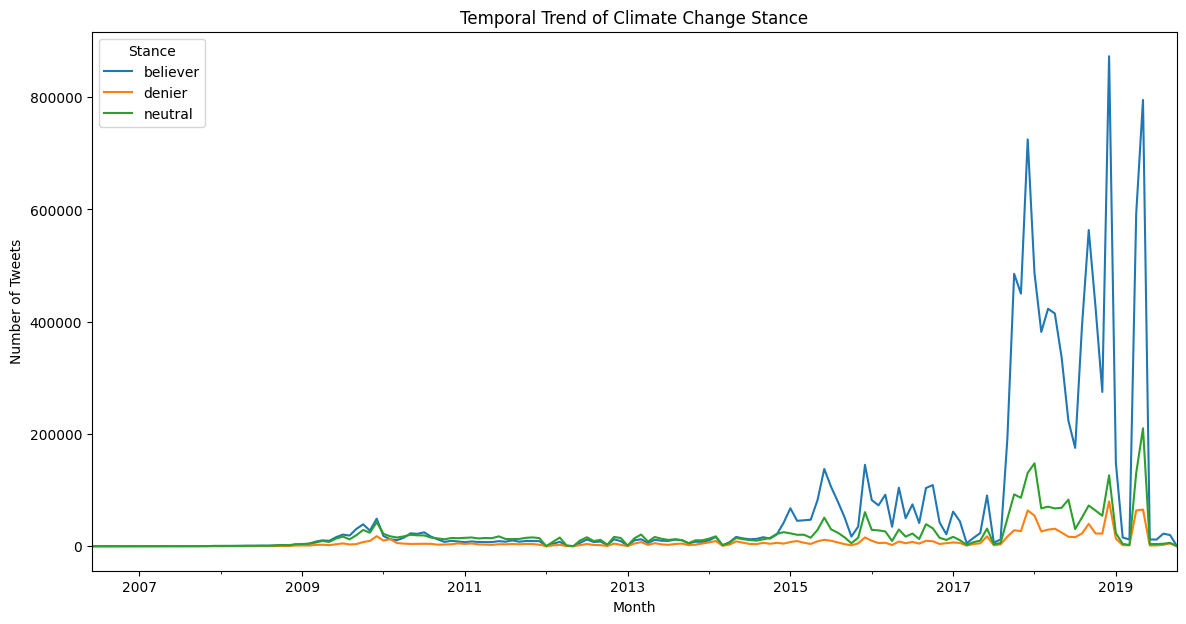

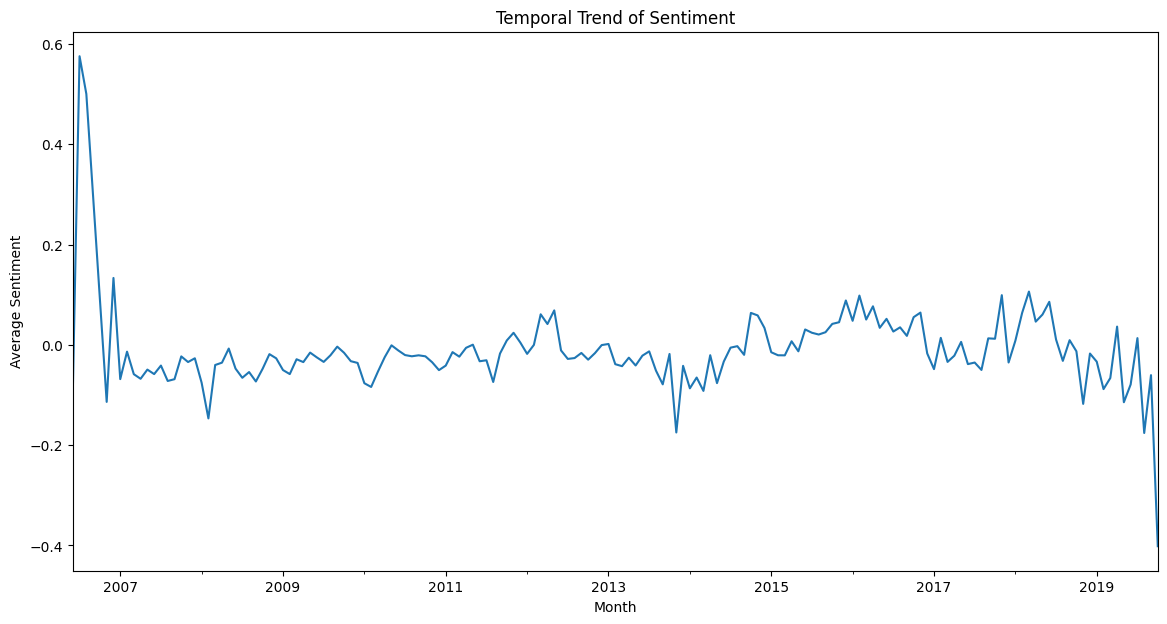

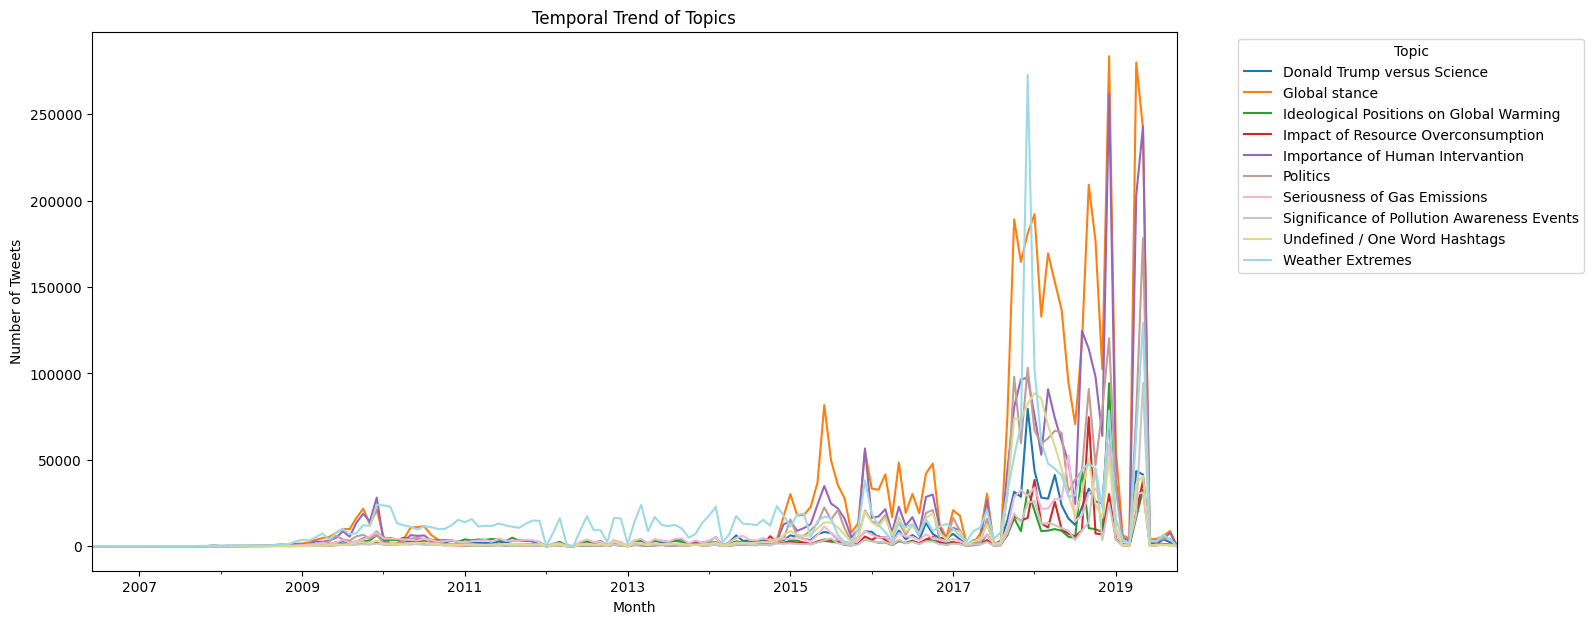

In [ ]:
import matplotlib.pyplot as plt

# Convert created_at to datetime
df['created_at'] = pd.to_datetime(df['created_at'])

# Extract year and month for temporal analysis
df['year'] = df['created_at'].dt.year
df['month'] = df['created_at'].dt.to_period('M')

# Temporal trend of stance
stance_counts = df.groupby(['month', 'stance']).size().unstack().fillna(0)

plt.figure(figsize=(14, 7))
stance_counts.plot(ax=plt.gca())
plt.title('Temporal Trend of Climate Change Stance')
plt.xlabel('Month')
plt.ylabel('Number of Tweets')
plt.legend(title='Stance')
plt.show()

# Temporal trend of sentiment
df['sentiment'] = pd.to_numeric(df['sentiment'], errors='coerce')
sentiment_avg = df.groupby('month')['sentiment'].mean()

plt.figure(figsize=(14, 7))
sentiment_avg.plot(ax=plt.gca())
plt.title('Temporal Trend of Sentiment')
plt.xlabel('Month')
plt.ylabel('Average Sentiment')
plt.show()

# Temporal trend of topics
topic_counts = df.groupby(['month', 'topic']).size().unstack().fillna(0)

plt.figure(figsize=(14, 7))
topic_counts.plot(ax=plt.gca(), colormap='tab20')
plt.title('Temporal Trend of Topics')
plt.xlabel('Month')
plt.ylabel('Number of Tweets')
plt.legend(title='Topic', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



<ipython-input-13-16cefef67d58>:12: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


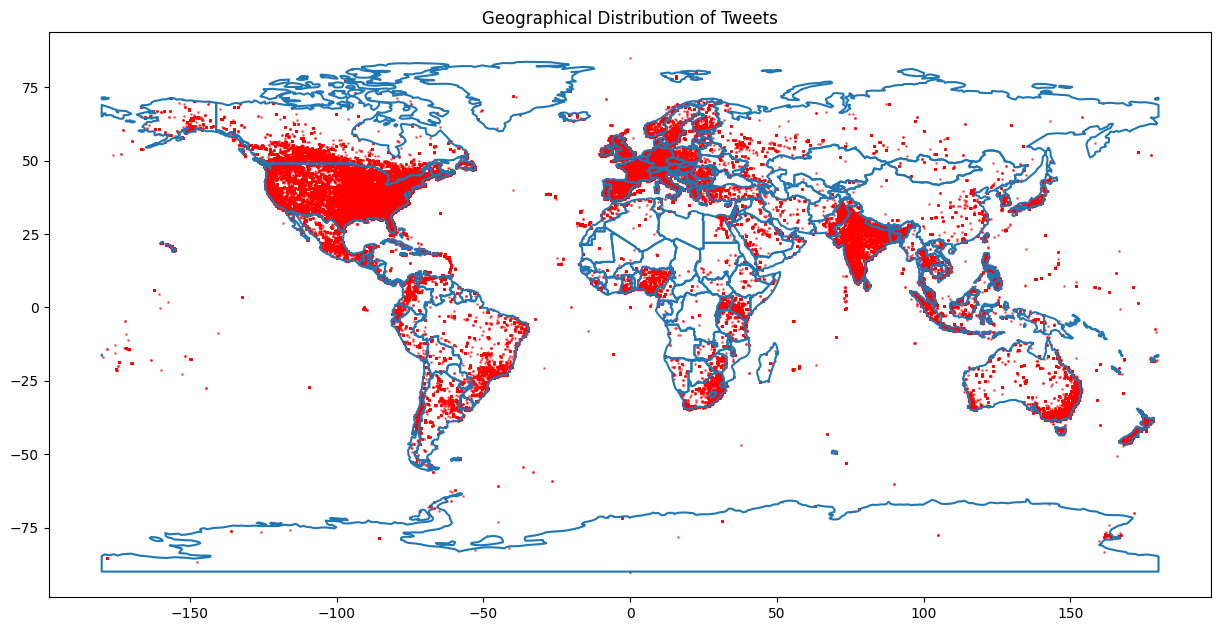

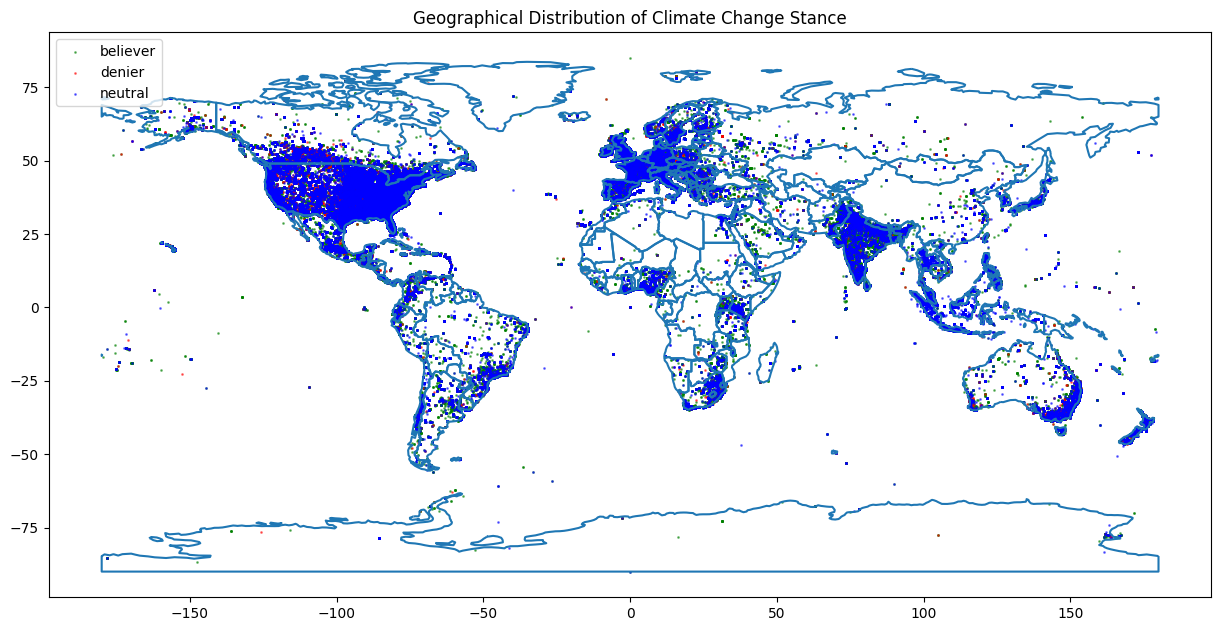

In [ ]:
import geopandas as gpd
from shapely.geometry import Point

# Filter out rows with NaN values in latitude and longitude
df_geo = df.dropna(subset=['lat', 'lng'])

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(
    df_geo, geometry=gpd.points_from_xy(df_geo.lng, df_geo.lat))

# Load world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plot the geographical distribution of tweets
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax)
gdf.plot(ax=ax, markersize=1, color='red', alpha=0.5)
plt.title('Geographical Distribution of Tweets')
plt.show()

# Analyze stance distribution across the world
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax)

for stance, color in zip(['believer', 'denier', 'neutral'], ['green', 'red', 'blue']):
    subset = gdf[gdf['stance'] == stance]
    subset.plot(ax=ax, markersize=1, color=color, alpha=0.5, label=stance)

plt.title('Geographical Distribution of Climate Change Stance')
plt.legend()
plt.show()
